# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [2]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [3]:
def f(x):
    return (x*x)*numpy.sin(x);


Ensure your function works with numpy arrays:

In [4]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [5]:
def g(x):
    return (-x*x*numpy.cos(x))+(2*x*numpy.sin(x))+2*numpy.cos(x)-2;

Check your solution with the same numpy array:

In [6]:
assert g(0) == 0.

In [7]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [8]:
def integrate_analytic(xmin, xmax):
    return g(xmax)-g(xmin);

Check your analytic function:

In [9]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [10]:
def integrate_numeric(xmin, xmax, N):
    dx=(xmax-xmin)/N
    m=dx/2
    S=f(xmin)+f(xmax)
    p=dx/6
    for i in range (1,2*N):
        if i%2==1:
            S=S+4*f(xmin+(i*dx/2))
        if i%2==0:
            S=S+2*f(xmin+(i*dx/2))
    return p*(S)

print(integrate_numeric(0,4,50))

1.096590995599109


Make sure you have implemented Simpson's rule correctly:

In [11]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [12]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


Text(0.5,1,'Logarithmic plot of fractional error vs ln(number of panels)')

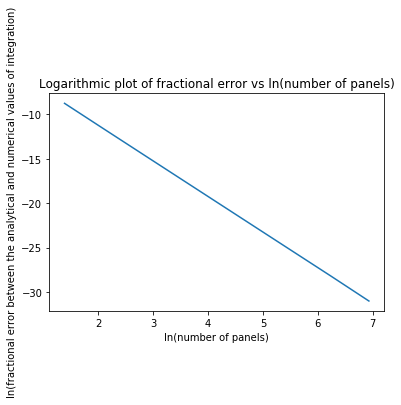

In [26]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution


numeric=[]
for i in range (0,9):
    numeric.append(integrate_numeric(x0,x1,panel_counts[i]))
frac_err=numpy.abs(result_analytic-numeric)/numpy.abs(result_analytic)
plt.plot(numpy.log(panel_counts),numpy.log(frac_err))
plt.ylabel('ln(fractional error between the analytical and numerical values of integration)')
plt.xlabel('ln(number of panels)')
plt.title('Logarithmic plot of fractional error vs ln(number of panels)')

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

Increasing the number of panels will increase the accuracy of the numerical integration method because the curve shape being used to model the function will be a better fit over a smaller range of x. However, if we have too many panels then the error in the value will begin to increase. This happens first for higher order models as we approach higher numbers of panels and the error can increase above simpler models so a more complex model is not always as accurate.

If the trapezium rule was being used, how would the panel
count affect accuracy? 